In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.optimize
from scipy import linalg
from numpy import linalg
from scipy.misc import derivative
from scipy.optimize import fsolve
%matplotlib inline

## Метод Ньютона для решения систем нелинейных уравнений

Предположим, что исходя из начального приближения $x^{(0)}$ к решению $\bar{x}$ построены приближения $x^{(1)}, x^{(2)}, \ldots, x^{(n)}$. Заменим в системе

$\begin{equation*}
\begin{cases}
f_1(x_1, x_2, \ldots, x_m) = 0,\\
f_2(x_1, x_2, \ldots, x_m) = 0,\\
\ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \qquad \qquad \qquad \qquad (1)\\
f_m(x_1, x_2, \ldots, x_m) = 0.\\
\end{cases}
\end{equation*}$

каждую из функций $f_i \quad  (i = 1, 2, \ldots, m)$ главной линейной частью её разложения по формуле Тейлора в точке $x^{(n)}$:

$$f_i(x) \approx f_i(x^{(n)})+\sum\limits_{j=1}^{m} \cfrac{\partial f_i(x^{(n)})}{\partial x_j} (x_j-x_j^{(n)}).$$

В результате придем к системе линейных алгебраических уравнений:

$$f_1(x^{(n)})+\sum\limits_{j=1}^{m} \cfrac{\partial f_1(x^{(n)})}{\partial x_j} (x_j-x_j^{(n)}) = 0,$$

$$f_2(x^{(n)})+\sum\limits_{j=1}^{m} \cfrac{\partial f_2(x^{(n)})}{\partial x_j} (x_j-x_j^{(n)}) = 0,$$

$$\ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots$$

$$f_m(x^{(n)})+\sum\limits_{j=1}^{m} \cfrac{\partial f_m(x^{(n)})}{\partial x_j} (x_j-x_j^{(n)}) = 0,$$

имеющей в матричной форме записи следующий вид:

$$f(x^{(n)})+f^\prime(x^{(n)})(x-x^{(n)})=0; \qquad (2)$$

здесь $f^\prime$ - матрица Якоби:

$f^\prime(x) = \begin{pmatrix}
{\partial f_1 \over \partial x_1 (x)} & {\partial f_1 \over \partial x_2 (x)} & \cdots & {\partial f_1 \over \partial x_n (x)} \\
{\partial f_2 \over \partial x_1 (x)} & {\partial f_2 \over \partial x_2 (x)} & \cdots & {\partial f_2 \over \partial x_n (x)} \\
\cdots & \cdots & \cdots &\cdots \\
{\partial f_m \over \partial x_1 (x)} & {\partial f_m \over \partial x_2 (x)} & \cdots & {\partial f_m \over \partial x_n (x)}
\end{pmatrix}.$

Предположим, что матрица $f^\prime(x^{(n)})$ невырожденная, т.е. существует обратная матрица $(f^\prime(x^{(n)}))^{-1}$. Тогда система $(2)$ имеет единственное решение, которое и принимется за очередное приближение $x^{(n+1)}$ к решению $\bar{x}$.Таким образом, приближение $x^{(n+1)}$ удовлетворяет равенству

$$f(x^{(n)})+f^\prime(x^{(n)})(x^{(n+1)}-x^{(n)})=0, \qquad (3)$$

выражая из которого $x^{(n+1)}$, выводим итерационную формулу  метода Ньютона:

$$x^{(n+1)} = x^{(n)}-(f^\prime(x^{(n)}))^{-1} f(x^{(n)}).$$

#### Замечание.

Последняя формула предполагает использование трудоемкой операции обращения матрицы, поэтому непосрежственное её использование для вычисления $x^{(n+1)}$ в большинстве случаев нецелесообразно. Обычно вместо этого решают эквивалентую системе (3) систему линейных алгебраических уравнений:

$$f^\prime(x^{(n)}) \Delta x^{(n+1)} = - f(x^{(n)})$$

относительно поправки $\Delta x^{(n+1)} = x^{(n+1)} - x^{(n)}$. Затем полагают

$$x^{(n+1)} = x^{(n)} + \Delta x^{(n+1)}.$$


### Сходимость метода

#### Основная теорема о сходимости метода Ньютона

Пусть в некоторой окрестности $\bar{x}$ системы $(1)$ функции $f_i \quad (i = 1, 2, \ldots, m)$ дважды непрерывно дифференцируемы и матрица $f^\prime(\bar{x})$ невырождена. Тогда найдется такая маоая $\delta$-окрестность решения $\bar{x}$, что при произвольном выборе начального приближения $x^{(0)}$ из этой окрестности итерационная последовательность метода Ньютона не выходит за пределы оксретности и справедлива оценка:

$$\Vert x^{(n+1)} - \bar{x} \Vert \le \cfrac{1}{\delta} \Vert x^{(n)} - \bar{x}\Vert^2, n \ge 0.$$

Эта оценка означает, что метод сходится с квадратичной скоростью.

Квадратичная скорость сходимости метода Ньютона позволяет использовать простой практический критерий окончания итераций

$$\Vert x^{(n)} - x^{(n-1)}\Vert < \varepsilon.$$

## Задание

Найти с точность $\varepsilon = 10^{-6}$ все корни системы нелинейных уравнений

$f_1(x_1, x_2)=0,$

$f_2(x_1, x_2) = 0,$

используя метод Ньютона для системы нелинейных уравнений. Найти корни с помощью встроенной функции.

## Система нелинейных уравнений

$\begin{equation*}
\begin{cases}
sin(x_1 - 1) + x_2 - 0,1 = 0\\
x_1 - sin(x_2 + 1) - 0,8 = 0\\
\end{cases}
\end{equation*}$

## С помощью встроенной fsolve

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.fsolve.html

Find the roots of a function.

Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate.

In [33]:
def equations(p):
    x, y = p
    return (np.sin(x-1) + y + 0.1, x - np.sin(y+1) - 0.8)

x1, x2 =  fsolve(equations, (1.5, -0.2))

print((x1,x2))

(1.3381579548739657, -0.43174993070374057)


In [3]:
def f1(x1, x2):
    return np.sin(x1-1) + x2 - 0.1
def f2(x1, x2):
    return x1 - np.sin(x2+1) - 0.8

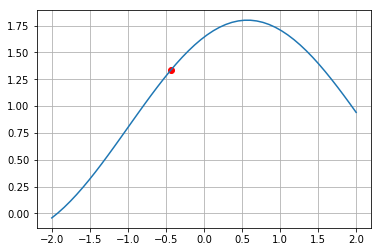

In [5]:
x = np.linspace(-2, 2)
fx = 0.8 + np.sin(x+1)
plt.plot(x, fx)
plt.grid(True)
plt.scatter(-0.43174993070374057, 1.3381579548739657, c='r')

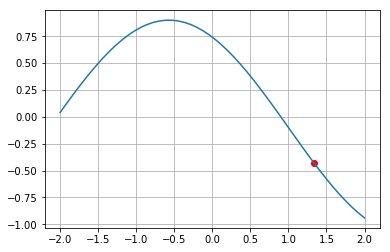

In [6]:
y = np.linspace(-2, 2)
fy = -0.1-np.sin(y-1)
plt.plot(y, fy)
plt.grid(True)
plt.scatter(1.3381579548739657, -0.43174993070374057, c='r')

In [26]:
def F(x):
    return np.array([np.sin(x[0]-1)+x[1]-0.1, x[0]-np.sin(x[1]+1)-0.8])

def J(x):
    return np.array([[np.cos(x[0]-1), 1], [1, -np.cos(x[1]+1)]])

$F=0$ - система;

$J$ - Якобиан;

$x$ - начальное приближение;

итерации продолжаются до выполнения неравенства $\Vert F \Vert < \varepsilon$.

In [46]:
def Newton_system(F, J, x, eps):
    F_value = F(x)
    F_norm = np.linalg.norm(F_value, ord=2)  # None: Frobenius norm, 2-norm
    iteration_counter = 0
    while abs(F_norm) > eps:
        delta = np.linalg.solve(J(x), -F_value)
        x = x + delta
        F_value = F(x)
        F_norm = np.linalg.norm(F_value, ord=2)
        iteration_counter += 1

    # Here, either a solution is found, or too many iterations
    #if abs(F_norm) > eps:
        #iteration_counter = -1
    return x, iteration_counter

In [51]:
Newton_system(F, J, np.array([1.3, -0.4]), 1e-6)

(array([ 1.43071734, -0.31752274]), 3)